In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [31]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strat

In [32]:
data = sns.load_dataset("titanic")

In [33]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
# einfache Features wählen
X = data[["pclass", "age", "sex"]]
X = pd.get_dummies(X, drop_first=True)
y = data["survived"]

In [35]:
X.head()

,pclass,age,sex_male
0,3,22.0,True
1,1,38.0,False
2,3,26.0,False
3,1,35.0,False
4,3,35.0,True


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)

In [37]:
X_train.shape

(623, 3)

In [38]:
X_test.shape

(268, 3)

In [39]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [41]:
model.get_n_leaves()

np.int64(108)

In [42]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [43]:
y_pred_train[1:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 0])

In [44]:
y_pred_test[1:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1])

In [45]:
y_prob_test = model.predict_proba(X_test)

In [46]:
y_prob_test[1:10]

array([[0.88888889, 0.11111111],
       [0.91176471, 0.08823529],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.        , 1.        ],
       [0.83333333, 0.16666667],
       [0.        , 1.        ]])

In [48]:
print("Accuracy Train:", accuracy_score(y_train, y_pred_train))
print("Accuracy Test :", accuracy_score(y_test, y_pred_test))

Accuracy Train: 0.8876404494382022
Accuracy Test : 0.7985074626865671


In [49]:
acc = accuracy_score(y_test, y_pred_test)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average="binary")
auc = roc_auc_score(y_test, y_prob_test[:,1])

print(f"Accuracy={acc:.3f}  Precision={prec:.3f}  Recall={rec:.3f}  F1={f1:.3f}  ROC-AUC={auc:.3f}")

Accuracy=0.799  Precision=0.782  Recall=0.660  F1=0.716  ROC-AUC=0.768


In [53]:
print("Classification Report – Decision Tree")
print(classification_report(y_test, y_pred_test, digits=3))

Classification Report – Decision Tree
              precision    recall  f1-score   support

           0      0.807     0.885     0.844       165
           1      0.782     0.660     0.716       103

    accuracy                          0.799       268
   macro avg      0.794     0.773     0.780       268
weighted avg      0.797     0.799     0.795       268



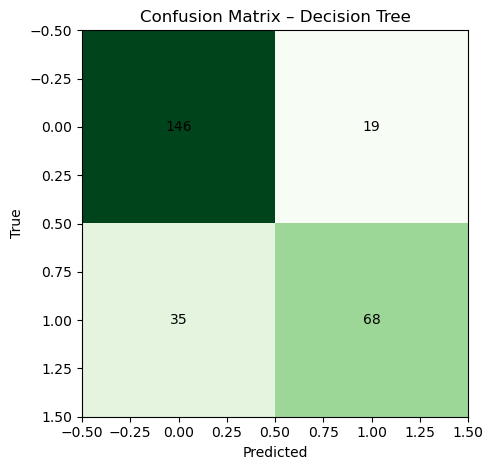

In [50]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure()
plt.imshow(cm, interpolation='nearest', cmap='Greens')
plt.title("Confusion Matrix – Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha='center', va='center')
plt.tight_layout()
plt.show()

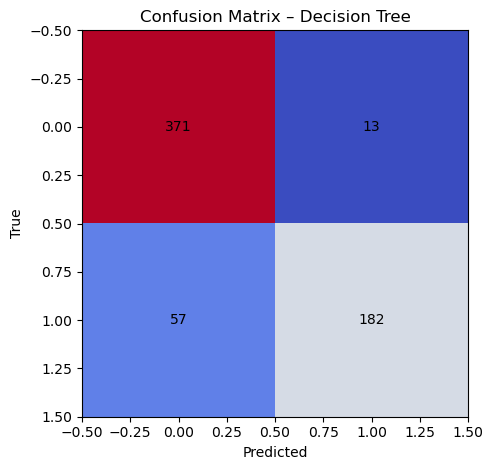

In [51]:
cm = confusion_matrix(y_train, y_pred_train)

plt.figure()
plt.imshow(cm, interpolation='nearest', cmap='coolwarm')
plt.title("Confusion Matrix – Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha='center', va='center')
plt.tight_layout()
plt.show()

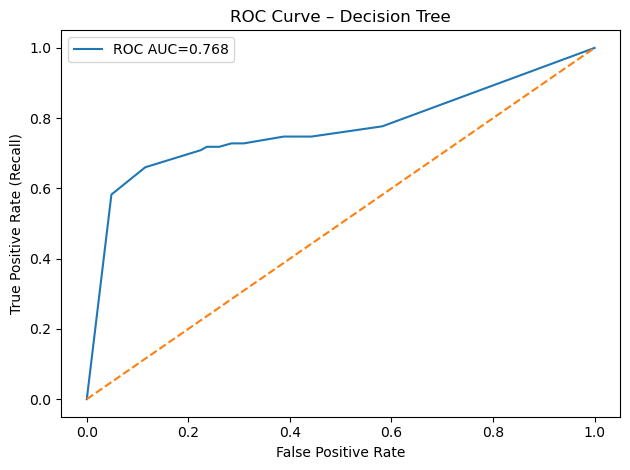

In [52]:
fpr, tpr, thr = roc_curve(y_test, y_prob_test[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC={auc:.3f}")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – Decision Tree")
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation der ROC-Kurve

Die **ROC-Kurve (Receiver Operating Characteristic)** zeigt, wie gut das Modell zwischen den beiden Klassen unterscheiden kann – unabhängig von der gewählten Entscheidungsschwelle.

- **x-Achse:** *False Positive Rate (FPR)*  
  Anteil negativer Fälle, die fälschlich als positiv klassifiziert wurden.  
  \( $\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} $\)

- **y-Achse:** *True Positive Rate (Recall)*  
  Anteil tatsächlicher Positiver, die richtig erkannt wurden.  
  \( $\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} $\)

- **Orange gestrichelte Linie:** Zufallsentscheidung (AUC = 0.5)

- **Blaue Linie:** Das Modell – je weiter sie oben links liegt, desto besser.

Der **AUC-Wert (Area Under Curve)** fasst die Trennschärfe in einer Zahl zusammen:
- **1.0** → perfektes Modell  
- **0.5** → Zufall  
- **0.768** → gutes, aber nicht perfektes Modell

Ein Decision Tree erreicht typischerweise AUC-Werte zwischen 0.7 und 0.8.  
Er unterscheidet also brauchbar zwischen „positiv“ und „negativ“, kann aber durch *Pruning* oder *Ensembles* (z. B. Random Forest, Boosting) oft noch verbessert werden.


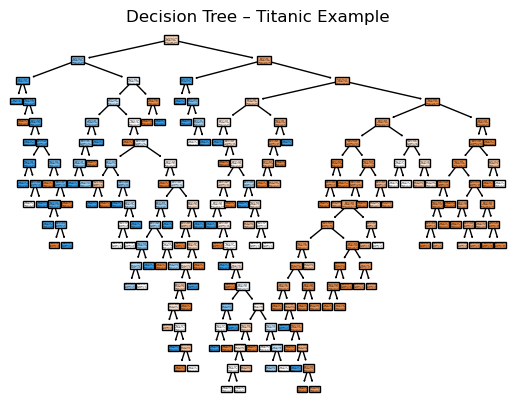

In [54]:
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True);
plt.title("Decision Tree – Titanic Example")
plt.savefig("decision_tree_titanic01.png", dpi=3000) 

In [71]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

### Experimentieren mit Hyperparametern des Decision Trees

Unten sind typische Parameter eines `DecisionTreeClassifier` aufgeführt, die sich gut eignen, um den Einfluss auf Overfitting, Generalisierung und Modellstruktur zu erkunden.  
Die Studierenden können damit ausprobieren, **wie sich die Entscheidungen des Baums, seine Tiefe und die Genauigkeit verändern.**

---

#### 1. **Baumkomplexität steuern**
| Parameter | Beschreibung | Beispielwerte / Experimente |
|------------|---------------|------------------------------|
| `max_depth` | Maximale Tiefe des Baums. Begrenzt, wie oft gesplittet werden darf. | `None` (unbegrenzt), `3`, `5`, `10`, `20` |
| `min_samples_split` | Mindestanzahl an Samples, die nötig sind, um einen Knoten zu teilen. | `2`, `5`, `10`, `20` |
| `min_samples_leaf` | Mindestanzahl an Samples in einem Blatt. | `1`, `3`, `5`, `10` |
| `max_leaf_nodes` | Maximale Anzahl Blätter. Alternativer Weg, die Komplexität zu begrenzen. | `None`, `10`, `20`, `50` |

---

#### 2. **Split-Kriterien und Strategien**
| Parameter | Beschreibung | Beispielwerte / Experimente |
|------------|---------------|------------------------------|
| `criterion` | Maß für die Homogenität der Knoten. | `'gini'`, `'entropy'`, `'log_loss'` |
| `splitter` | Strategie zur Auswahl der Splitpunkte. | `'best'` (Standard), `'random'` (führt zu variableren, oft flacheren Bäumen) |

---

#### 3. **Feature-Auswahl und Gewichtung**
| Parameter | Beschreibung | Beispielwerte / Experimente |
|------------|---------------|------------------------------|
| `max_features` | Anzahl der Features, die bei einem Split berücksichtigt werden. | `None`, `'sqrt'`, `'log2'`, feste Zahl (`3`, `5` …) |
| `class_weight` | Gewichtung der Klassen (nützlich bei unbalancierten Datensätzen). | `None`, `'balanced'` |

---

#### 4. **Regularisierung / Pruning**
| Parameter | Beschreibung | Beispielwerte / Experimente |
|------------|---------------|------------------------------|
| `ccp_alpha` | Komplexitätsparameter für Cost-Complexity-Pruning. Größere Werte → stärkeres Pruning. | `0.0`, `0.001`, `0.01`, `0.05` |
| `min_impurity_decrease` | Mindestverbesserung der Gini-Impurity, um einen Split durchzuführen. | `0.0`, `0.001`, `0.01` |

---

#### 5. **Zufälligkeit und Reproduzierbarkeit**
| Parameter | Beschreibung | Beispielwerte / Experimente |
|------------|---------------|------------------------------|
| `random_state` | Zufallsseed für Reproduzierbarkeit. | `None`, `42`, `1`, `123` |

---

**Aufgabe:**  
Wählt 2–3 Parameter aus und verändert sie systematisch.  
Beobachtet anschließend:
- Wie ändern sich **Train- und Test-Accuracy**?  
- Wie verändert sich die **Baumstruktur** (Tiefe, Anzahl Blätter)?  
- Wann tritt **Overfitting** auf?

So bekommt ihr ein Gefühl dafür, wie man die Komplexität und Generalisierungsfähigkeit eines Entscheidungsbaums steuern kann.


In [ ]:
for crit in ["gini", "entropy"]:
    model2 = DecisionTreeClassifier(max_depth=3, criterion=crit, random_state=42)
    model2.fit(X_train, y_train)
    print(f"{crit} - Accuracy Test:", model2.score(X_test, y_test))

In [ ]:
model = DecisionTreeClassifier('min_impurity_decrease': 0.1, random_state=42)
model.fit(X_train, y_train)

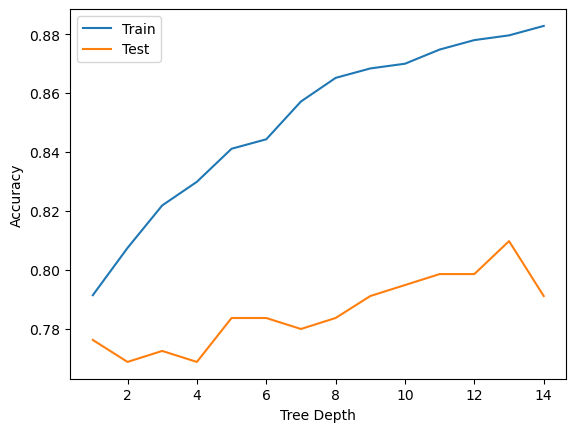

In [66]:
depths = range(1, 15)
train_acc, test_acc = [], []

for d in depths:
    model1 = DecisionTreeClassifier(max_depth=d, random_state=42)
    model1.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model1.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model1.predict(X_test)))

plt.plot(depths, train_acc, label="Train")
plt.plot(depths, test_acc, label="Test")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Einfluss der Baumtiefe auf Trainings- und Testgenauigkeit

Dieser Plot zeigt, wie sich die **Tiefe des Entscheidungsbaums (`max_depth`)** auf die **Accuracy** auswirkt – getrennt für Trainings- und Testdaten.

#### Interpretation:
- **Train (blaue Linie):**  
  Mit zunehmender Tiefe steigt die Trainingsgenauigkeit stetig an.  
  Der Baum kann die Trainingsdaten immer besser anpassen und irgendwann **nahezu perfekt** klassifizieren.  
  → Das ist typisch für **Overfitting**.

- **Test (orange Linie):**  
  Auf den Testdaten verbessert sich die Genauigkeit zunächst, erreicht aber ein Plateau  
  und fällt danach leicht ab.  
  → Der Baum lernt zunehmend **Rauschen** in den Trainingsdaten statt allgemeine Muster.

#### Fazit:
- **Kleine Tiefe → Underfitting:** Der Baum ist zu einfach, erkennt Muster nicht.  
- **Mittlere Tiefe → Optimaler Bereich:** Gute Balance zwischen Bias und Varianz.  
- **Große Tiefe → Overfitting:** Der Baum passt sich zu stark an Trainingsdaten an und verallgemeinert schlechter.

Der ideale Wert für `max_depth` liegt dort, wo die Testgenauigkeit am höchsten ist.


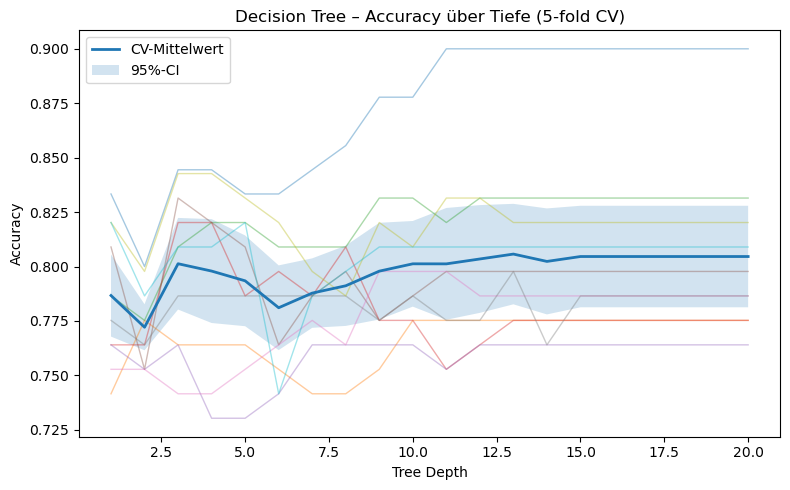

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

X_all, y_all = X, y  # falls deine Variablen anders heißen
depths = range(1, 21)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Scores: shape = (n_splits, n_depths)
all_scores = np.zeros((cv.get_n_splits(), len(depths)))

for j, d in enumerate(depths):
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(model, X_all, y_all, cv=cv, scoring="accuracy")
    all_scores[:, j] = scores

mean_scores = all_scores.mean(axis=0)
std_scores  = all_scores.std(axis=0)
sem_scores  = std_scores / np.sqrt(all_scores.shape[0])  # Standardfehler
ci95_low    = mean_scores - 1.96 * sem_scores
ci95_high   = mean_scores + 1.96 * sem_scores

plt.figure(figsize=(8,5))

# alle Fold-Linien (transparent)
for k in range(all_scores.shape[0]):
    plt.plot(depths, all_scores[k, :], linewidth=1, alpha=0.4)

# Mittelwert + 95%-CI-Band
plt.plot(depths, mean_scores, linewidth=2, label="CV-Mittelwert")
plt.fill_between(depths, ci95_low, ci95_high, alpha=0.2, label="95%-CI")

plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree – Accuracy über Tiefe (5-fold CV)")
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation der CV-Accuracy über die Baumtiefe

Der Plot zeigt die mittlere Klassifikationsgenauigkeit (Accuracy) eines Decision Trees in Abhängigkeit von der **Baumtiefe**.  
Die dünnen Linien stellen die Ergebnisse der einzelnen Cross-Validation-Folds dar,  
die blaue Linie den Mittelwert und das blaue Band das 95%-Konfidenzintervall.

**Beobachtungen:**
- Die Linien der einzelnen Folds schwanken deutlich, vor allem bei kleinen Baumtiefen.
- Der Mittelwert bleibt relativ stabil, ohne einen klar ausgeprägten optimalen Punkt zu zeigen.
- Die Unsicherheiten (Konfidenzband) sind relativ groß, was auf eine hohe Varianz der CV-Ergebnisse hindeutet.

**Mögliche Ursachen:**
1. **Kleine Feature-Anzahl (nur 3 Merkmale):**  
   Der Baum hat nur begrenzte Trennmöglichkeiten und kann keine komplexeren Muster lernen.

2. **Geringe Stichprobengröße:**  
   Wenn das Dataset klein ist, unterscheiden sich die Trainings- und Testaufteilungen in den Folds stark, was zu schwankenden Ergebnissen führt.

3. **Hohe Überlappung der Klassen im Feature-Raum:**  
   Wenn sich die Klassen anhand der vorhandenen Features schlecht trennen lassen, reagiert der Baum empfindlich auf zufällige Unterschiede in den Daten.

4. **Fehlende Regularisierung oder unbalancierte Klassen:**  
   Ein unbalancierter Datensatz oder ein nicht optimal gewählter Score (z. B. Accuracy statt F1) kann ebenfalls die Stabilität beeinflussen.

**Fazit:**
Die Cross-Validation zeigt, dass die Modellgüte über die Tiefe hinweg nur schwach variiert und insgesamt unsicher ist.  
Das deutet darauf hin, dass entweder mehr oder aussagekräftigere Features benötigt werden oder ein anderes Modell (z. B. Random Forest oder Boosting) stabilere Ergebnisse liefern könnte.


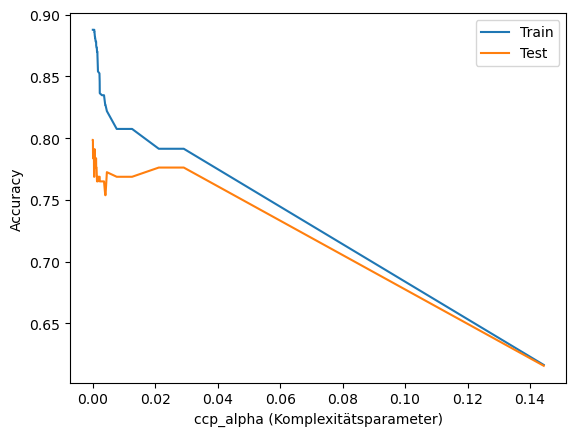

In [56]:
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(ccp_alphas, train_scores, label='Train')
plt.plot(ccp_alphas, test_scores, label='Test')
plt.xlabel("ccp_alpha (Komplexitätsparameter)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Interpretation der Cost-Complexity-Pruning-Kurve

Die Grafik zeigt, wie sich die Genauigkeit von Trainings- und Testdaten mit zunehmendem **Komplexitätsparameter** `ccp_alpha` verändert.

**Hintergrund:**
Beim Cost-Complexity-Pruning (auch „post-pruning“) wird der vollständig gewachsene Baum nachträglich vereinfacht.  
Der Parameter `ccp_alpha` steuert, wie stark Knoten mit geringem Informationsgewinn entfernt werden.

- Kleine Werte von `ccp_alpha` → kaum oder kein Pruning → sehr komplexer Baum  
- Große Werte von `ccp_alpha` → stärkeres Pruning → einfacherer, flacher Baum

**Interpretation der Kurven:**
- **Train (blaue Linie):**  
  Mit steigendem `ccp_alpha` nimmt die Trainingsgenauigkeit stetig ab.  
  Der Baum verliert Komplexität und kann die Trainingsdaten nicht mehr perfekt abbilden.

- **Test (orange Linie):**  
  Zunächst bleibt die Genauigkeit stabil oder steigt leicht an, weil das Modell generalisiert.  
  Ab einem bestimmten Punkt fällt die Genauigkeit wieder ab, da der Baum zu stark vereinfacht wurde und relevante Muster verliert.

**Fazit:**
Es gibt einen Bereich mittlerer `ccp_alpha`-Werte, in dem die Testgenauigkeit am höchsten ist.  
Dort liegt der optimale Kompromiss zwischen Modellkomplexität und Generalisierungsfähigkeit.
